For variables measured on a nominal or an ordinal scale, it's common to use a **bar chart** to visualize their distribution.

We've taken information from the `Experience` column, and created a new column of data type factor named `Exp_ordinal`, which is measured on an ordinal scale. The new column has five ordered levels, and each one corresponds to a number of years a player has played in the WNBA:

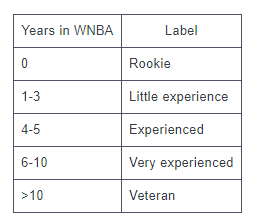

**Task**

* Create a **vertical bar** chart to display the distribution of the `Exp_ordinal` variable.

* Create a **horizontal bar** chart to display the distribution of the `Exp_ordinal` variable.

**Answer**

`ggplot(data = wnba, 
       aes(x = Exp_ordinal, fill = Exp_ordinal)) +
  geom_bar() + 
  theme(legend.position = "none")`

`ggplot(data = wnba, 
       aes(x = Exp_ordinal, fill = Exp_ordinal)) +
  geom_bar() + 
  coord_flip() +  
  theme(legend.position = "none")`

The `geom_bar()` geom generates a vertical bar chart with the frequencies on the y-axis, and the unique values on the x-axis.

We can improve the aesthetics of the plot by setting the `fill` aesthetic to give each bar a distinct color based on unique categories in the data.

Setting the `fill` aesthetic also creates a legend that describes how the fill colors map to each player position. In this case, player position is also described on the x-axis so having a legend does not add value. We can hide the legend to improve the bar chart

To generate a horizontal bar chart in the same style as above, we add the [`coord_flip()` geom](https://ggplot2.tidyverse.org/reference/coord_flip.html)

Above  we used bar charts to display frequencies. Bar charts can also be used to display proportions and percentages. By default, the `geom_bar()` geom of the `ggplot2` package displays `count` on the y-axis. If instead of a frequncy count we prefer to display the proporion of observations within each category, we supply the argument `..prop..` to the y-axis. We also need to specify the argument `group = 1`

`geom_bar()` supports only the two computed variables that we have seen so far: `count` (the default) and groupwise proportions with `..prop..`. If we prefer to display percentage instead of proportion, we multiply the proportions by 100.

The x and y-axis labels are customized with the `labs` argument. Finally, to color the bars uniquely by player position we need to supply the argument `fill = factor(..x..)` within the `aes()` call

**Task**

Create a **vertical bar** chart to display the percentage distribution of the `Exp_ordinal` variable.

**Answer**

`ggplot(data = wnba, 
       aes(x = Exp_ordinal, 
           y = ..prop.. * 100, 
           group = 1, 
           fill = factor(..x..))) +
  geom_bar() + 
  theme(legend.position = "none") +
  labs(x = "Experience Level",
       y = "Percentage")`

Another method using bar charts is to stack the bars together into one single bar. This is known, intuitively, as a **stacked bar chart**. An advantage of the stacked bar chart is that, collectively, the bars stacked on top of one-another add up to represent the entirety of the data. In other words, the stacked bar displays the "whole" representation of the data.

To build a stacked bar chart, it is useful to summarize the data for the variable we are interested in by creating a summary table of proportions by category.

`pos_prop <- wnba %>% 
  group_by(Pos) %>% 
  summarize(Prop = n() / nrow(wnba))`
  
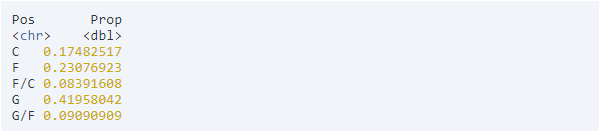

To generate a stacked bar from this data, we need the `Prop` variable, or proportions, to be displayed on the y-axis. To fill in the color of the bar by player position, we set `fill = Pos` within the `aes()` call. So what argument do we provide to the x-axis? We don't need to represent anything here other than the width of the bar itself, so we set the value of `x` to equal `""`, an empty string:

`ggplot(data = pos_prop, 
              aes(x = "", y = Prop, fill = Pos)) + 
  geom_bar(stat = "identity")`

Within the `geom_bar()` geom, we set the statistic to `"identity"` because, in this case, we do not need `ggplot2` to calculate anything for us. We have already provided the proportions, we only need the identity of those proportions. So far, the stacked bar chart looks like this:

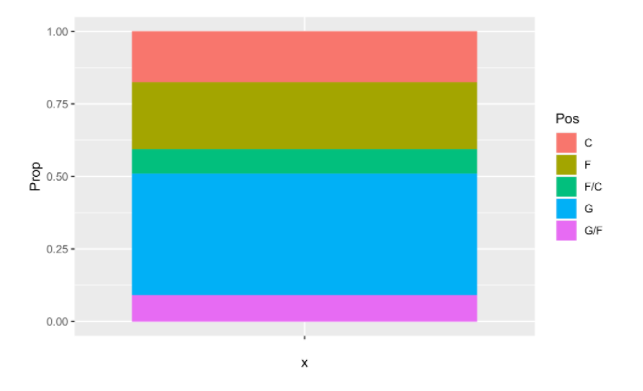

It is typical to see stacked bar charts displayed horizontally. It is also common for the bar itself to be narrower. We can improve our stacked bar chart by flipping the coordinates and adjusting the width:

`ggplot(data = pos_prop, 
              aes(x = "", y = Prop, fill = Pos)) + 
  geom_bar(stat = "identity", width = 0.25) +
  coord_flip()`
  
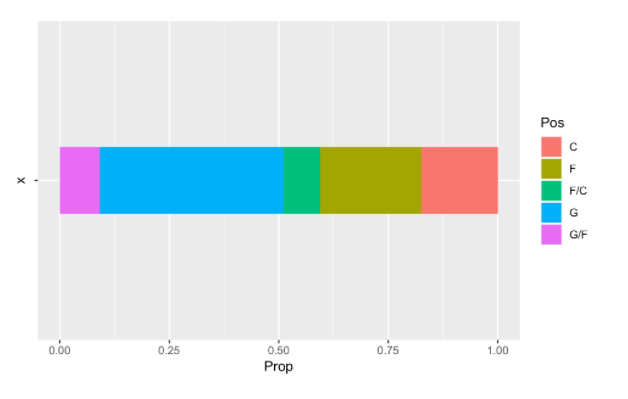

From this bar chart, it is clear that the most common player position in the WNBA is the guard position. We can also see that the least common player positions are forward/center and guard/forward. The bar chart in it's current form is useful for exploratory data analysis. We are able to study the stacked bar chart and make conclusions about the distribution of players by position.

The bar chart we generated above still needs some work if we want to make it more presentable. The code below provides a template for making this stacked bar chart more presentable. Learn about the specifications below in the ggplot2 [`function reference`](https://ggplot2.tidyverse.org/reference/). This code can be easily adapted to work with other variables


`library(stringr)`

`ggplot(data = pos_prop, 
              aes(x = "", y = Prop, fill = Pos)) + 
  geom_bar(stat = "identity", width = 0.25) +
  coord_flip() +
  geom_text(aes(label = str_c(round(Prop * 100), "%")), 
            position = position_stack(vjust = 0.5)) + 
  labs(x = NULL, 
       y = NULL, 
       fill = NULL, 
       title = "Player Distribution by Position") + 
  theme_classic() + 
  theme(axis.line = element_blank(),
          axis.text = element_blank(),
          axis.ticks = element_blank())`
          
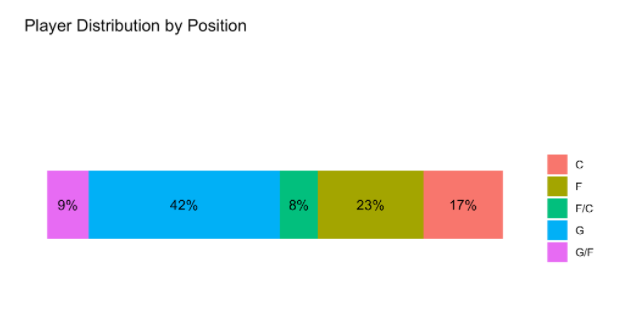

**Task**

Building stacked bar charts by working with the `Exp_ordinal` variable

**Answer**

`library(stringr)`

`exp_prop <- wnba %>% 
  group_by(Exp_ordinal) %>% 
  summarize(Prop = n() / nrow(wnba))`

`ggplot(data = exp_prop, 
       aes(x = "", y = Prop, fill = Exp_ordinal)) + 
  geom_bar(stat = "identity", width = 0.25) +
  coord_flip() +
  geom_text(aes(label = str_c(round(Prop * 100), "%")), 
            position = position_stack(vjust = 0.5)) + 
  labs(x = NULL, 
       y = NULL, 
       fill = NULL, 
       title = "Player Distribution by Experience Level") + 
  theme_classic() + 
  theme(axis.line = element_blank(),
          axis.text = element_blank(),
          axis.ticks = element_blank())`

Another kind of graph we can use to visualize the distribution of nominal and ordinal variables is a **pie chart**. Pie charts have a [`bad reputation`](https://www.businessinsider.com/pie-charts-are-the-worst-2013-6) in the world of data visuaization, but there are advocates of pie charts as well. We'll leave it up to you to decide whether pie charts provide a meaningful way to display distributions. But whether we like them or not, our boss or our client may request a pie chart from us someday. We'll show how to built pie charts in `ggplot2` so that we are prepared.

We can generate pie charts with `ggplot2` using the [`coord_polar()` geom](https://ggplot2.tidyverse.org/reference/coord_polar.html). In `ggplot2` pie charts are stacked bar charts displayed in polar coordinates. To create a pie chart we add the `coord_polar()` geom to the same code we used to develop the stacked bar chart. This is how we'd do that for the `Pos` variable:


`pos_prop <- wnba %>% 
  group_by(Pos) %>% 
  summarize(Prop = n() / nrow(wnba))`

`ggplot(data = pos_prop, 
              aes(x = "", 
                  y = Prop, 
                  fill = Pos)) + 
  geom_bar(stat = "identity") +
  coord_polar(theta = "y")`
  
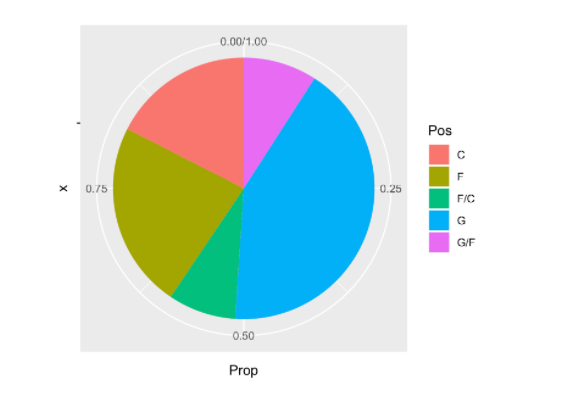

Some people argue that the main advantage of pie charts over bar charts is that they provide a much better sense for the relative frequencies (proportions and percentages) in the distribution. But some say it's really hard to tell what proportion in the distribution each category takes. 

**Task**

Generate a pie chart to visualize the distribution of the `Exp_ordinal` variable.


**Answer**

`exp_prop <- 
  wnba %>% 
  group_by(Exp_ordinal) %>% 
  summarize(Prop = n() / nrow(wnba))`
  
`ggplot(data = exp_prop, 
       aes(x = "", y = Prop, fill = Exp_ordinal)) + 
  geom_bar(stat = "identity", width = 0.25) +
  coord_polar(theta = "y") +
  geom_text(aes(label = str_c(round(Prop * 100), "%")), 
            position = position_stack(vjust = 0.5)) + 
  labs(x = NULL, 
       y = NULL, 
       fill = NULL, 
       title = "Player Distribution by Experience Level") + 
  theme_classic() + 
  theme(axis.line = element_blank(),
          axis.text = element_blank(),
          axis.ticks = element_blank())`

Because of the special properties of variables measured on interval and ratio scales, we can describe distributions in more elaborate ways. Let's examine the `PTS` (total points) variable, which is discrete and measured on a ratio scale:

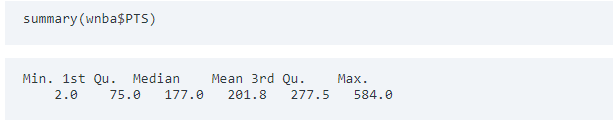

We can see that the lower 75% of the values are distributed within a relatively narrow interval (between 2 and 277), while the remaining upper 25% are distributed in an interval that's slightly larger.

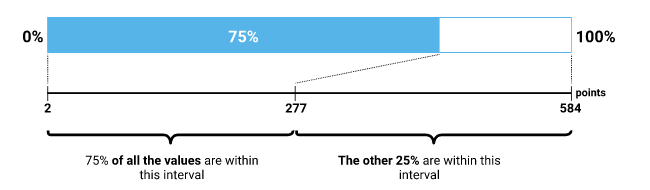

To visualize the distribution of the PTS variable, we need to use a graph that allows us to see immediately the patterns outlined above. The most commonly used graph for this scenario is the **histogram**.

**Task**

Use `geom_histogram()` to generate a histogram to visualize the distribution of the `Games_Played` variable.

**Answer**

`ggplot(data = wnba, 
       aes(x = Games_Played)) +
  geom_histogram()`

To modify the number of class intervals used for a histogram, we can use the `bins` parameter of `geom_histogram()`. The default number of bins displayed in a `ggplot2` histogram is 30. We learned that 10 is a good number of class intervals to choose for frequency distributions because it offers a good balance between information and comprehensibility.


But with histograms, visualizing a picture is much easier than reading a grouped frequency table, so a larger number of class intervals can be used. However, once the number of class intervals goes over 30 or so, the granularity increases so much that for some intervals the frequency will be zero. This will result in a discontinued histogram from which is hard to discern patterns. Upon display of the plot `ggplot2` provides the message `"stat_bin()` using `bins = 30`. Pick better value with `binwidth."`. To change the number of bins, specify the number of bins in the bins argument within `geom_histogram()`.

**Task**

Use `geom_histogram()` to generate two histograms to visualize the distribution of the `Games_Played` variable.
* Display 4 bins in the first plot.
* Display 60 bins in the second plot.

**Answer**

`ggplot(data = wnba, 
       aes(x = Games_Played)) +
  geom_histogram(bins = 4)`

`ggplot(data = wnba, 
       aes(x = Games_Played)) +
  geom_histogram(bins = 60)`

To ensure that the histogram bins match our desired class intervals we need to specify two arguments to `geom_histogram()`: (1) `boundary` and (2) `binwidth`.

The `boundary` argument specifies the boundary between two bins. In our case we want the left-most (lower bin) to start at the minimun value present in the `wnba$PTS` variable. We cannot have any values lower than the minumum value, 2 points, so we do not want the bin to go lower than the minumum. The second argument we need to provide is `binwidth`.

In a histogram, all bins cover the same width. In our case, we want 10 bins, so the `binwidth` is equal to the total **range** of the `PTS` variable, divided by 10. The range is the difference between the minimum and maximum value for a variable. This is calculated as the maximum value of the PTS column, minus the minimum value. The range divided by 10 has been saved to a variable called `pts_binwidth` below:

`pts_binwidth <- (max(wnba$PTS) - min(wnba$PTS)) / 10`

`ggplot(data = wnba, 
       aes(x = PTS)) +
  geom_histogram(boundary = min(wnba$PTS), 
                 binwidth = pts_binwidth)`

**Task**

Use `geom_histogram()` to generate a histogram to visualize the distribution of the `Games_Played` variable.

**Answer**

`wnba <- wnba %>% 
  mutate(games_categories = cut(Games_Played, breaks = 10, dig.lab = 4))`
  
`games_binwidth <- (max(wnba$Games_Played) - min(wnba$Games_Played)) / 10`

`ggplot(data = wnba, 
       aes(x = Games_Played)) +
  geom_histogram(boundary = min(wnba$Games_Played), 
                 binwidth = games_binwidth)`
                 


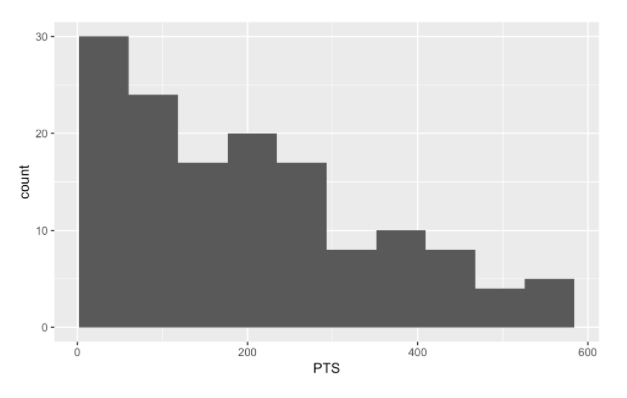

The default x-axis tick marks in the points histogram shown are not very useful because labels are provided in 200-point intervals.

We can customize the x-axis tick marks so that tick mark labels appear in 50-point intervals by setting the `breaks` argument within the `scale_x_continuous()` geom, like this:

`pts_binwidth <- (max(wnba$PTS) - min(wnba$PTS)) / 10`

`ggplot(data = wnba, 
       aes(x = PTS)) +
  geom_histogram(boundary = min(wnba$PTS), 
                 binwidth = pts_binwidth) +
  scale_x_continuous(breaks = seq(0, 600, by = 50))`

From the output of `summary(wnba$PTS)` we can see that most of the values (75%) are distributed within a relatively narrow interval (between 2 and 277). This tells us that:

* The values are distributed unevenly across the 2 - 584 range (2 is the minimum value in the PTS variable, and 584 is the maximum).
* Most values are clustered in the first (left) part of the the distribution's range.

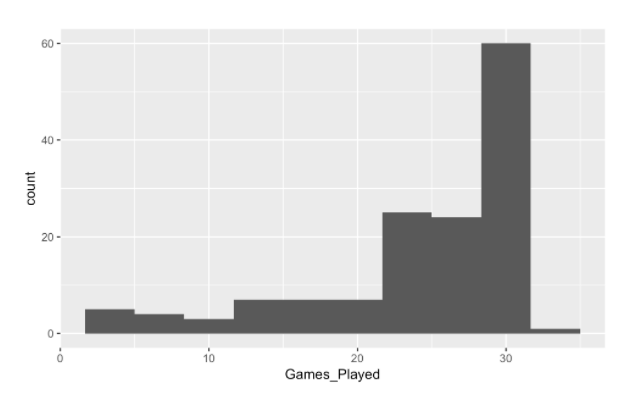

We can immediately see the same two patterns on the histogram above:

* The distribution of values is uneven, with each class interval having a different frequency. If the distribution was even, all the class intervals would have the same frequency.
* Most values (roughly three quarters) are clustered in the left half of the histogram.

**Task**

Use `geom_histogram()` to generate a histogram to visualize the distribution of the `Games_Played` variable.

**Answer**

`games_binwidth <- (max(wnba$Games_Played) - min(wnba$Games_Played)) / 10`

`ggplot(data = wnba, 
       aes(x = Games_Played)) +
  geom_histogram(boundary = min(wnba$Games_Played), 
                 binwidth = games_binwidth) +
  scale_x_continuous(breaks = seq(0, 35, by = 5)`

It should now be clear that a histogram is basically the visual form of a grouped frequency table. Structurally, a histogram can also be understood as a modified version of a bar chart. The main difference is that, in the case of a histogram, there are no gaps between bars, and each bar represents an interval, not a single value.

The main reason we remove the gaps between bars in case of a histogram is that we want to show that the class intervals we plot are adjacent to one another. With the exception of the last interval, the ending point of an interval is the starting point of the next interval, and we want that to be seen on the graph.

We add gaps for bar charts because, in most cases, we don't know whether the unique values of ordinal variables are adjacent to one another in the same way as two class intervals are. It's safer to assume that the values are not adjacent, and add gaps.

Sometime histograms show skewed distributions. In a skewed distribution:

* The values pile up toward the end or the starting point of the range, making up the body of the distribution.
* Then the values decrease in frequency toward the opposite end, forming the tail of the distribution.

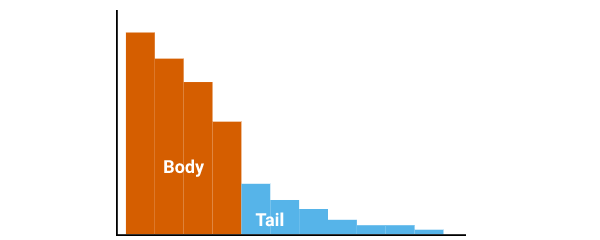

If the tail points to the left, then the distribution is said to be **left skewed**. When it points to the left, the tail points at the same time in the direction of negative numbers, and for this reason the distribution is sometimes also called **negatively skewed**.

If the tail points to the right, then the distribution is right skewed. The distribution is sometimes also said to be **positively skewed** because the tail points in the direction of **positive numbers**.

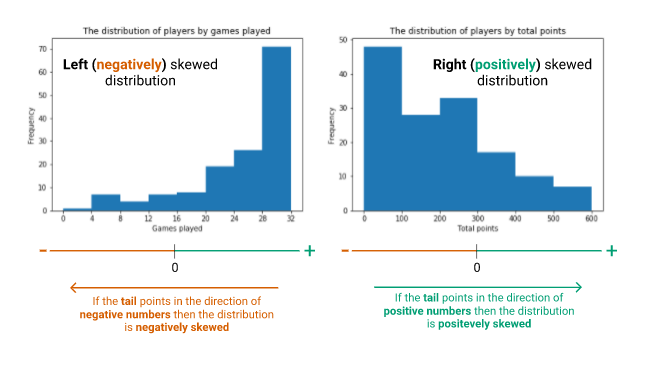

Besides skewed distributions, we often see histograms with a shape that is more or less symmetrical. If we draw a vertical line exactly in the middle of a symmetrical histogram, then we'll divide the histogram in two halves that are mirror images of one another.

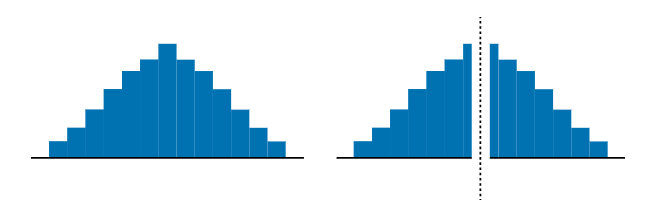

If the shape of the histogram is symmetrical, then we say that we have a **symmetrical distribution**.

A very common symmetrical distribution is one where the values pile up in the middle and gradually decrease in frequency toward both ends of the histogram. This pattern is specific to what we call a **normal distribution** (also called Gaussian distribution).

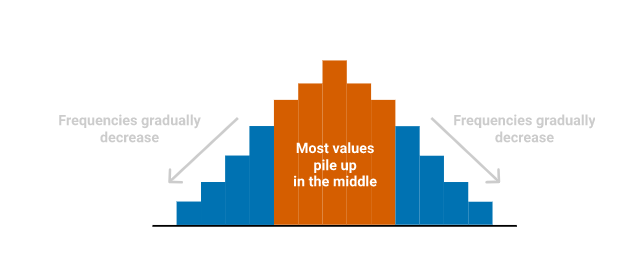

Another common symmetrical distribution is one where the values are distributed uniformly across the entire range. This pattern is specific to a **uniform distribution**.

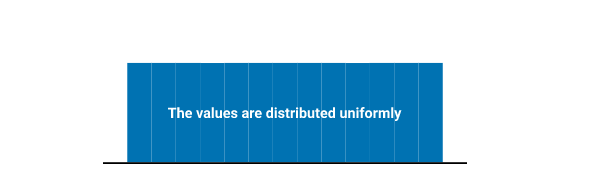

We rarely see perfectly symmetrical distributions in practice. However, it's common to use perfectly symmetrical distributions as baselines for describing the distributions we see in practice.

When we say that the distribution resembles closely a normal distribution, we mean that most values pile up somewhere close to the middle and decrease in frequency more or less gradually toward both ends of the histogram.

A similar reasoning applies to skewed distributions. We don't see very often clear-cut skewed distributions, and we use the left and right skewed distributions as baselines for comparison.